## Artifical Neural Network

An Artifical Neural Network (ANN) is comprised of multiple layers, containing an input layer, hidden layers and an output layer. Each node connects to another and has an associated weight and threshold. 

![Artifical Neural Network](image-5.png)

Resources:
- https://www.ibm.com/topics/neural-networks
- https://www.youtube.com/watch?v=aircAruvnKk

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import copy 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [32]:
# Store data as dataframe and display the head (from data stored in file)
column_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
                'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order',
                'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report',
                'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you',
                'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 
                'word_freq_hp', 'word_freq_hpl', 'word_freq_george','word_freq_650', 'word_freq_lab', 'word_freq_labs',
                 'word_freq_telnet','word_freq_857', 'word_freq_data', 'word_freq_415','word_freq_85','word_freq_technology',
                'word_freq_1999', 'word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting',
                'word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference',
                
                'char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#',
                
                'capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam'
                ]

filepath = '/Users/ejallen/Desktop/Machine_Learning_Project/02_Data/spambase/spambase.data'
df_spam = pd.read_csv(filepath, header=None, names=column_names)

display(df_spam.head())
df_spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [33]:
# split the data into training and testing
x = df_spam.drop('spam', axis=1)
y = df_spam.iloc[:,-1].to_numpy().ravel()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Algorithm Overview 

In this overview, we consider a 3-layer network, note the same principle applies to having more hidden layers, The layers are:
 1) The **input** layer
 2) One **hidden** layer
 3) The **output** layer.

Take a look at the schematic below: 
- There are two groups of 'lines' between the layers, connecting each neuron. These lines represent the **weights** of our neural network $\boldsymbol{W}$. 
- Each layer might also have its own bias term $\boldsymbol{b}$ (not shown). 
- Note: henceforth, we do not use bold symbols for matrices.

![Three Layer ANN](image-7.png)

Therefore, the model parameters are $W_1$, $b_1$, $W_2$, $b_2$. The hidden layer output is $A_1$, and the output layer result is $A_2$.


**Mathematical Overview:**

1. **Activation Functions:**
   Activation functions play a crucial role in neural networks by introducing non-linearity, enabling the model to learn complex patterns. The choice of activation functions varies for different layers:

   1. *Hidden Layer:* Common choices include ReLU (Rectified Linear Unit) or sigmoid. ReLU is widely used due to its simplicity and effectiveness in mitigating the vanishing gradient problem.

   2. *Output Layer:* The selection depends on the nature of the problem. For binary classification, the sigmoid function is often used, producing values between 0 and 1. For multi-class classification, the softmax function is suitable as it normalizes the output into probability distributions. These functions transform the weighted sum of inputs into the desired output, facilitating the learning of intricate relationships within the data. <p> <!-- Paragraph break --></p>

2. **Cost Function:**
   The cost function $(J)$ quantifies the disparity between the predicted output and the actual output. Its selection is contingent on the problem at hand:

   - *Binary Classification:* Cross-Entropy Loss (Log Loss) is commonly used.
     $$ J = - \frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right) $$
   - *Multi-Class Classification:* Cross-Entropy Loss (Categorical Crossentropy) is prevalent.
     $$ J = - \frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log(\hat{y}_k^{(i)}) $$
   - *Regression:* Mean Squared Error (MSE) is a common choice.
     $$ J = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2 $$

3. **Loss Function:**
   The loss function (\(L\)) computes the average cost over a single training example. It is integral to the backpropagation algorithm for gradient computation.

4. **Backpropagation:**
   Backpropagation is the iterative process of computing gradients with respect to the parameters, enabling the model to learn and improve. Gradients are calculated using the chain rule, and the parameters (weights and biases) are updated accordingly. This process ensures the model continuously refines its understanding of the data, minimizing the overall error.

Resources
- In class coding week seven

#### Pipelines

A pipeline is a way to streamline a lot of the routine processes in a machine learning workflow. 

- *Documentation* - https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
- *Example with PCA and logistic regression* - https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html

#### K Fold Validation

we split our x_train into k different folds to train the data and repeat the training K times

In [34]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
k = 0
best_score = 0  

# Convert x_train and y_train to numpy arrays
X_train_val = np.array(x_train)
y_train_val = np.array(y_train)

# Loop over sections of data
for idx_train, idx_val in kf.split(X_train_val):
    X_train_k, X_val = X_train_val[idx_train], X_train_val[idx_val]
    y_train_k, y_val = y_train_val[idx_train], y_train_val[idx_val]

    # Use the pipeline to train a new model
    n = 39
    mlp_model = MLPClassifier(hidden_layer_sizes=(n,n), 
                           activation='relu',
                           solver='adam',
                           alpha=0.1,
                           early_stopping=True,
                           n_iter_no_change=10,
                           batch_size=32,
                           random_state=42, 
                           )
       

    pipe = Pipeline([('scaler', StandardScaler()), ('mlp_model', mlp_model)])
    pipe.fit(X_train_k, y_train_k)
    y_pred_lr = pipe.predict(X_val)

    # Calculate accuracy for the validation set
    accuracy = accuracy_score(y_val, y_pred_lr)
    print(f"Fold {k}: Accuracy for MLP model (with scaling): {accuracy}\n")
    k += 1
    
    if accuracy > best_score:
        best_model = copy.deepcopy(pipe)
        best_score = accuracy

# calculate accuracy for the best model and predict y values 
X_test_scaled = best_model['scaler'].transform(x_test)
y_pred = best_model['mlp_model'].predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy for MLP model (with scaling) on test set: {test_accuracy}\n")

# make and print classification report
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_result)

Fold 0: Accuracy for MLP model (with scaling): 0.9320652173913043

Fold 1: Accuracy for MLP model (with scaling): 0.9334239130434783

Fold 2: Accuracy for MLP model (with scaling): 0.936141304347826

Fold 3: Accuracy for MLP model (with scaling): 0.9266304347826086

Fold 4: Accuracy for MLP model (with scaling): 0.938858695652174


Accuracy for MLP model (with scaling) on test set: 0.9489685124864278

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       531
           1       0.95      0.92      0.94       390

    accuracy                           0.95       921
   macro avg       0.95      0.95      0.95       921
weighted avg       0.95      0.95      0.95       921



/Users/ejallen/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


#### Learning Curve 

A learning curve provides a visual representation of a model's performance as it learns from training data, depicting how training and validation (or test) errors evolve with changes in the size of the training dataset. 
Analysing learning curves helps identify issues like overfitting, underfitting, and the impact of dataset size on a model's ability to generalize to new data.

Bias:
- Bias is an error introduced by approximating a real-world problem too simplistically
- defined as the differenced between the predicted values and the true values
- High bias models lead to underfitting the data

Variance:
- Variance is the amount that a models predictions vary for different training sets, it measures the models sensitivity to the training data
- high variance models lead to overfitting

Resources:
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
- https://www.youtube.com/watch?v=lYAV5KNk_TY

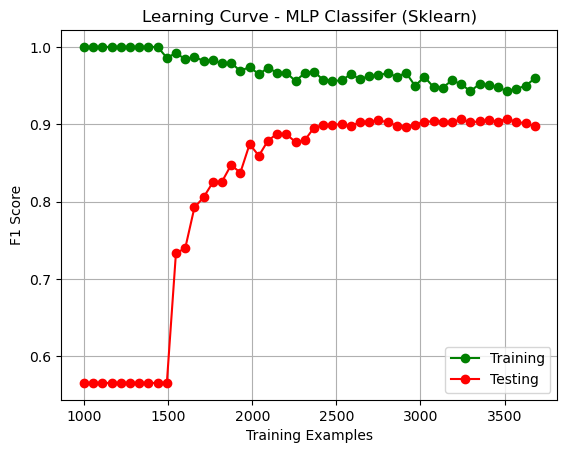

In [35]:
from sklearn.model_selection import learning_curve

def draw_learning_curves(X, y, estimator, num_trainings):

    # Start the plot at 1250 training examples - from running multiple times, both curves are straight lines until roughly 1500
    start_training_size = 1250
    train_sizes, train_scores, test_scores = learning_curve(
                                                            estimator=estimator,
                                                            X=X,
                                                            y=y,
                                                            cv=5,
                                                            n_jobs=1,
                                                            train_sizes=np.linspace(start_training_size / len(X), 1.0, num_trainings),
                                                            scoring='f1'
                                                            )
    
    train_score_mean = np.mean(train_scores, axis=1)
    test_score_mean = np.mean(test_scores, axis=1)

    plt.grid()
    plt.plot(train_sizes, train_score_mean, 'o-', color='g', label='Training')
    plt.plot(train_sizes, test_score_mean, 'o-', color='r', label='Testing')
    plt.title('Learning Curve - MLP Classifer (Sklearn)')
    plt.xlabel('Training Examples')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.show()

# Note: This might take a while to run, especially with a large number of training examples
draw_learning_curves(x, y, best_model, num_trainings=50)


#### Confusion Matrix 

The confusion matrix is a matrix that summarises the performance of a machine learning model on a set of test data. 

- The top left represents the TP, true positive 
- The top right represents the FP - false positive 
- The bottom left represents the FN - false negative 
- The bottom right represents the TN - true negative 

Hence for a more accurate model, we expect the values in the FP and FN to be small

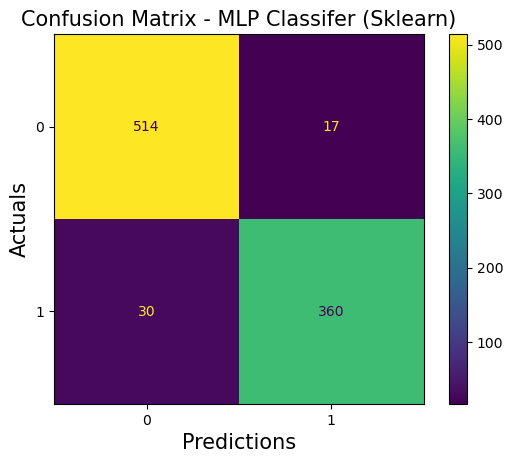

In [36]:
# Confusion Matrix 
confusion_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix)
conf_matrix.plot()
 
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix - MLP Classifer (Sklearn)', fontsize=15)
plt.show()

#### ROC Curve (Receiver Operating Characteristic Curve)

This a graph showing the performance of a classification model at all classification thresholds, the curve plots two parameters 

1. True Positive Rate (TPR)

$$ TPR = \frac{\text{True Positives }}{\text{ True Positives } + \text{ False Negatives}} $$

2. False Positive Rate (FPR)

$$ FPR = \frac{\text{False Positives }}{\text{ False Positives } + \text{ True Negatives}} $$


Further Resources:
- https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc


/Users/ejallen/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


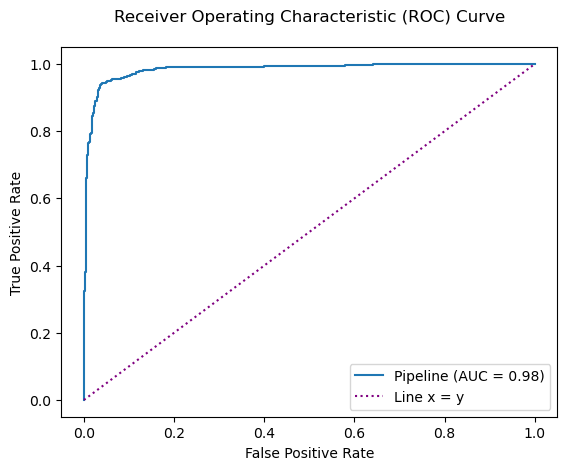

In [37]:
from sklearn import metrics

metrics.RocCurveDisplay.from_estimator(estimator=best_model, X=x_test, y=y_test)

# superimposed diagonal line for comparison
x_line = np.linspace(0, 1, 100)
plt.plot(x_line, x_line, label='Line x = y', color='purple', linestyle='dotted')

plt.title('Receiver Operating Characteristic (ROC) Curve\n')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [38]:
# Compute ROC curve and AUC
y_probs = best_model.predict_proba(x_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_probs)

print(f'The Area under the ROC Curve (AUC) is {auc_roc}')

The Area under the ROC Curve (AUC) is 0.9837703413974601


/Users/ejallen/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


#### Matthews Correlation Coefficient (MCC) 

- The Matthews Correlation Coefficient (MCC) is a metri that takes into account all four values in the confusion matrix to 
provide a balanced measure of the classification performance 
- It ranges from -1 to 1, where 1 indicates a perfect prediction, 0 represents no better than random and -1 indicates total disagreement between prediction and observation
- Formula is given by:

$$ \text{MCC} = \frac{\text{TP} \times \text{TN} - \text{FP} \times \text{FN}}{\sqrt{(\text{TP} + \text{FP}) \times (\text{TP} + \text{FN}) \times (\text{TN} + \text{FP}) \times (\text{TN} + \text{FN})}} $$



In [39]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)
print(f'the Matthews Correlation Coefficient is {mcc}')

the Matthews Correlation Coefficient is 0.89540041789313


#### Cohen's Kappa

Cohen's Kappa is used to evaulate the agreement between the predicted and true class while account for the possibiilty of agreement occuring by chance. This is particularly useful for imbalanced datasets. It is calculated by:


$$\kappa = \frac{P_o - P_e}{1 - P_e}$$

Where:
- $P_o$ is the observed agreement
- $P_e$ is the expected agreement by chance.

Resources:
- https://en.wikipedia.org/wiki/Cohen%27s_kappa
- https://thenewstack.io/cohens-kappa-what-it-is-when-to-use-it-and-how-to-avoid-its-pitfalls/

In [40]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa}")

Cohen's Kappa: 0.895022881214123


##### General Notes 

How to choose network size:
- should be less than 2x input layer size
- between the size of the input and output layers
- 2/3 the size of the input layer plus the size of the output layer